<a href="https://colab.research.google.com/github/Aaina26/Deep-Learning-Unschool/blob/main/Project_1_NN_for_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf #import lib

In [ ]:
#for loading data
mnist=tf.keras.datasets.mnist
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()
xtrain, xtest=xtrain/255.0,xtest/255.0

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
print("xtrain.shape:",xtrain.shape)#print shape of xtrain

xtrain.shape: (60000, 28, 28)


In [ ]:
#Building the model
model=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
#training the model
t=model.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 3ms/step - loss: 0.2945 - accuracy: 0.9138 - val_loss: 0.1405 - val_accuracy: 0.9570
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1401 - accuracy: 0.9576 - val_loss: 0.1071 - val_accuracy: 0.9677
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1070 - accuracy: 0.9674 - val_loss: 0.0907 - val_accuracy: 0.9722
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0871 - accuracy: 0.9729 - val_loss: 0.0820 - val_accuracy: 0.9744
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0755 - accuracy: 0.9764 - val_loss: 0.0759 - val_accuracy: 0.9774
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0641 - accuracy: 0.9796 - val_loss: 0.0738 - val_accuracy: 0.9777
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0573 - accuracy: 0.9818 - val_loss: 0.0700 - val_accuracy:

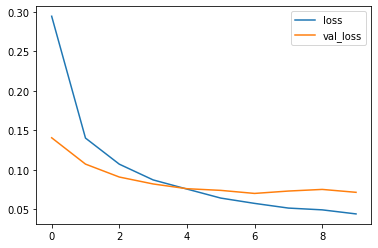

In [ ]:
import matplotlib.pyplot as plt
plt.plot(t.history['loss'],label='loss')
plt.plot(t.history['val_loss'],label='val_loss')
plt.legend()

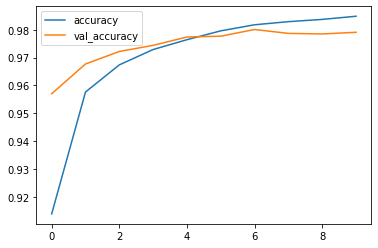

In [ ]:
plt.plot(t.history['accuracy'],label='accuracy')
plt.plot(t.history['val_accuracy'],label='val_accuracy')
plt.legend()

In [ ]:
#Model Evaluation
print(model.evaluate(xtest,ytest))

313/313 [==============================] - 1s 3ms/step - loss: 0.0714 - accuracy: 0.9791
[0.07135886698961258, 0.9790999889373779]


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
pred=model.predict(xtest).argmax(axis=1)
cm=confusion_matrix(ytest,pred)
print(cm)

313/313 [==============================] - 1s 2ms/step
[[ 971    0    2    1    0    1    3    1    1    0]
 [   0 1122    2    2    0    0    2    0    7    0]
 [   6    1 1007    6    2    1    2    1    6    0]
 [   0    0    2  997    0    2    0    3    2    4]
 [   0    0    3    0  955    0    8    3    2   11]
 [   4    0    0   14    1  861    4    0    7    1]
 [   2    2    0    1    1    3  945    0    4    0]
 [   1    4   14    4    2    0    0  995    3    5]
 [   6    0    5    6    4    1    0    0  951    1]
 [   2    4    1    6    3    1    0    4    1  987]]


Text(0.5, 1.0, 'True labe:9 Predicted:1')

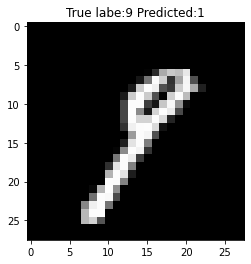

In [ ]:
import numpy as np
misclassified=np.where(pred!=ytest)[0]
i=np.random.choice(misclassified)
plt.imshow(xtest[i],cmap='gray')
plt.title("True labe:%s Predicted:%s"%(ytest[i],pred[i]))